In [20]:
import numpy as np
import matplotlib.pyplot as plt

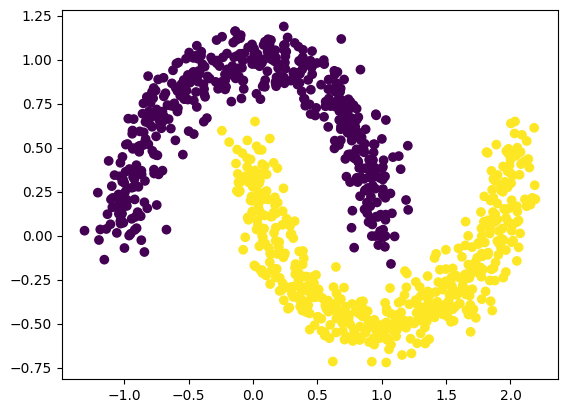

In [21]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=1000, noise=0.1, random_state=2)

plt.scatter(X[:,0], X[:,1], c=y)

# algorithm DBSCAN

1. Define a radius $\epsilon$
2. Define a required number of points N to be a core point
3. Define core points
    * Foreach point, determine the number of other points within a radius epsilon
    * if that number of points is N or higher, then that point is a core point.
    * if that number of points is lower than N, it is a "non-core" point
4. Randomly select a core point $x$ where $x$ is the beginning of a cluster
5. Any core points within a distance $\epsilon$ of $x$ is joined to that cluster
6. Any core points around the newly added core points are also added
7. Repeat step 6 until there are no more core points to add
8. Any non-core points within a distance $\epsilon$ of any core point in the cluster is added, but the process stops there.
9. Select another random core point not alread clustered - this is the beginning of the next cluster
10. Do this until all core points have been assigned to a cluster. 

In [22]:
import math

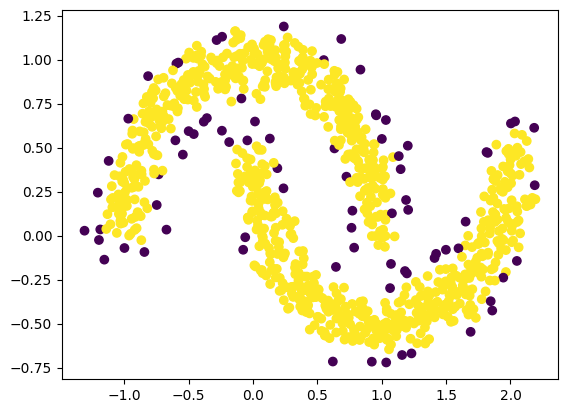

In [23]:
# Algorithm dbscan
core = []
E = 0.1
N = 4

for i in range(len(y)):
    num_neighbors = 0
    for j in range(len(y)):
        if i != j:
            dist = math.sqrt( (X[i,0] - X[j,0])**2 + (X[i,1] - X[j,1])**2)
            if dist < E:
                num_neighbors += 1
    if num_neighbors >= N:
        core.append(1)
    else:
        core.append(0)
        
plt.scatter(X[:,0],X[:,1], c=core)

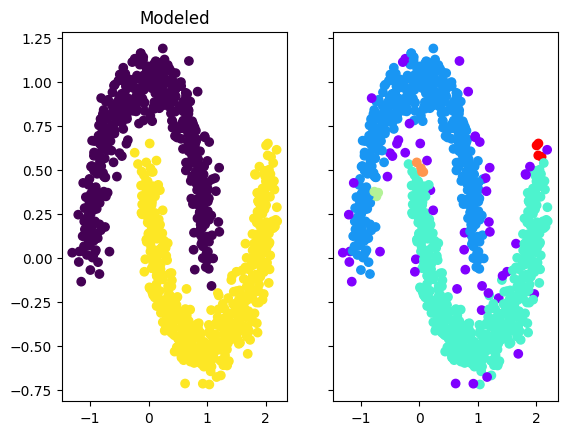

In [37]:
from sklearn.cluster import DBSCAN
N = 4
dbscan = DBSCAN(eps=0.08, min_samples=N)

y_pred = dbscan.fit_predict(X)

fix, ax = plt.subplots(1, 2, sharey=True)
ax[0].set_title('OG')
ax[0].scatter(X[:,0], X[:,1], c=y)
ax[0].set_title('Modeled')
ax[1].scatter(X[:,0], X[:,1], c=y_pred, cmap='rainbow')



In [38]:
from sklearn.datasets import load_iris
iris = load_iris()

iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

ValueError: 'c' argument has 1000 elements, which is inconsistent with 'x' and 'y' with size 150.

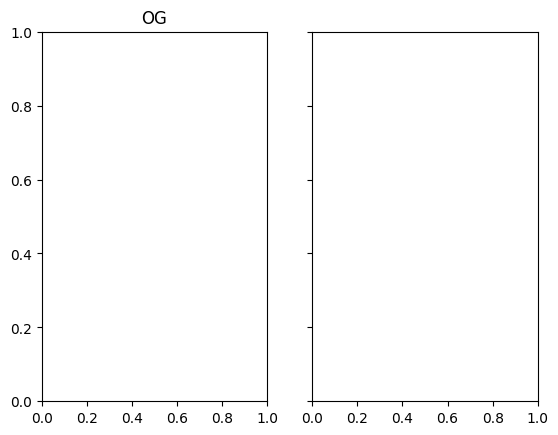

In [44]:
dbscan_iris = DBSCAN(eps=0.1, min_samples=3)

y_pred = dbscan_iris.fit_predict(iris.data)


fix, ax = plt.subplots(1, 2, sharey=True)
ax[0].set_title('OG')
ax[0].scatter(iris.data[:,2], iris.data[:,3], c=y)
ax[1].set_title('Modeled')
ax[1].scatter(iris.data[:,2], iris.data[:,3], c=y_pred)

